In [7]:
from Problem import Problem
import networkx as nx
import matplotlib.pyplot as plt
from src.instance import Solution
from src.genetic_algorithm import GeneticAlgorithm

In [8]:
problem = Problem(50, density=1)
G = problem.graph
pos_dict = {k: v['pos'] for k, v in G.nodes(data=True)}
gold_dict = {n: data['gold'] for n, data in G.nodes(data=True)}
paths_dict = nx.shortest_path(problem.graph, source=0, weight='dist')

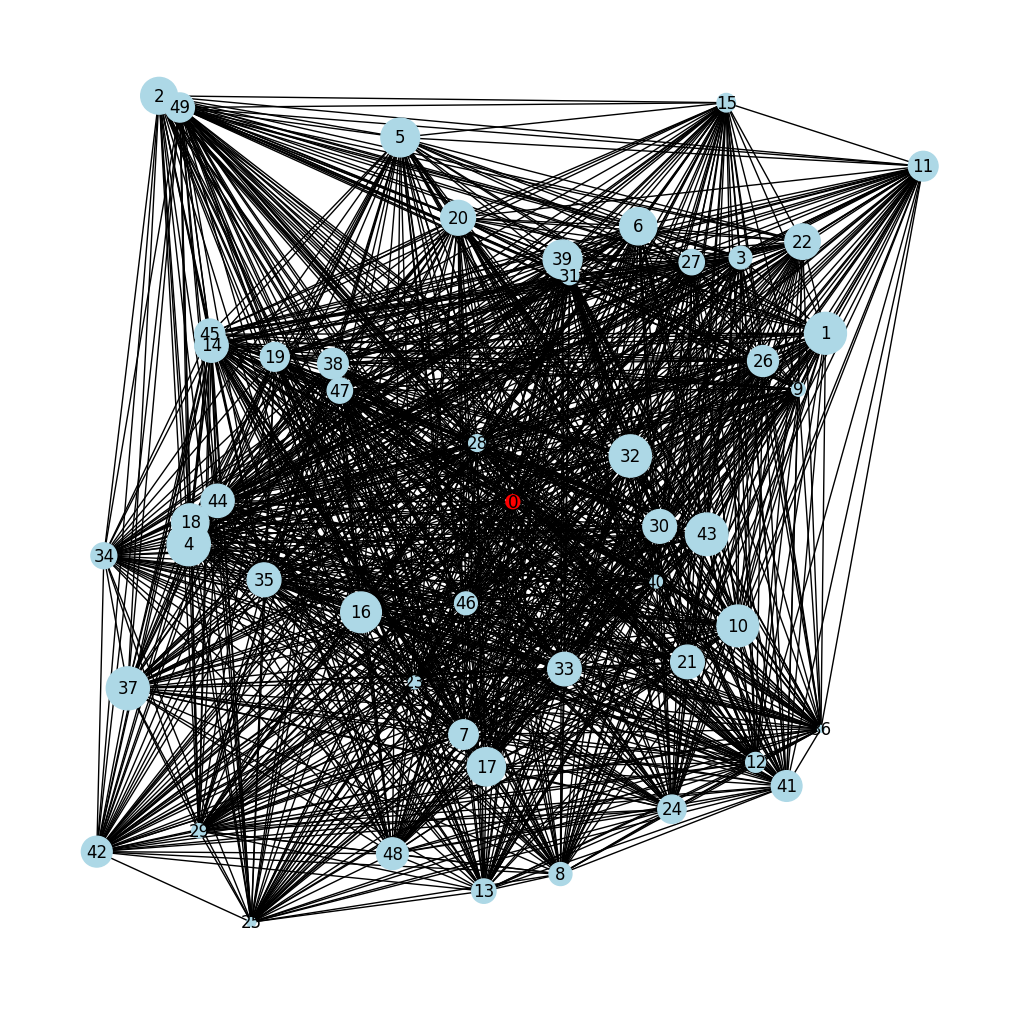

In [9]:
problem.plot()

In [10]:
sol = Solution(P=problem, G=problem.graph)

In [13]:
GA = GeneticAlgorithm(problem, paths_dict=paths_dict, gold_dict=gold_dict, G=problem.graph, max_generations= 50)
best_solution, best_cost = GA.solve()
base_cost = problem.baseline()
print(f"Baseline solution: {base_cost}")
print(f"GA solution: {best_cost}")

  0%|          | 0/50 [00:00<?, ?it/s]

Baseline solution: 8662.894218688043
GA solution: 8662.894218688045


In [14]:
best_solution.format_solution()

[(1, 908.6721100168994),
 (0, 0.0),
 (2, 700.0074266769388),
 (0, 0.0),
 (3, 266.60409149806003),
 (0, 0.0),
 (4, 969.2072009703761),
 (0, 0.0),
 (5, 778.9721530618289),
 (0, 0.0),
 (6, 717.1732989698367),
 (0, 0.0),
 (7, 449.9121406416449),
 (0, 0.0),
 (8, 272.96932028331383),
 (0, 0.0),
 (9, 97.2945711913458),
 (0, 0.0),
 (10, 902.6997941472978),
 (0, 0.0),
 (11, 456.32051354377745),
 (0, 0.0),
 (12, 203.16100143043508),
 (0, 0.0),
 (13, 306.6506675265018),
 (0, 0.0),
 (14, 579.6403493729541),
 (0, 0.0),
 (15, 177.59601015629246),
 (0, 0.0),
 (16, 856.7576698082831),
 (0, 0.0),
 (17, 758.7610103053748),
 (0, 0.0),
 (18, 719.7434929949859),
 (0, 0.0),
 (19, 432.6609467353286),
 (0, 0.0),
 (20, 627.6815318617407),
 (0, 0.0),
 (21, 584.5138709438229),
 (0, 0.0),
 (22, 650.1967549532652),
 (0, 0.0),
 (23, 85.3598768187492),
 (0, 0.0),
 (24, 416.391594768439),
 (0, 0.0),
 (25, 42.57255968803059),
 (0, 0.0),
 (26, 494.49682842527443),
 (0, 0.0),
 (27, 330.53135112045254),
 (0, 0.0),
 (28, 